# Portfolio Optimization

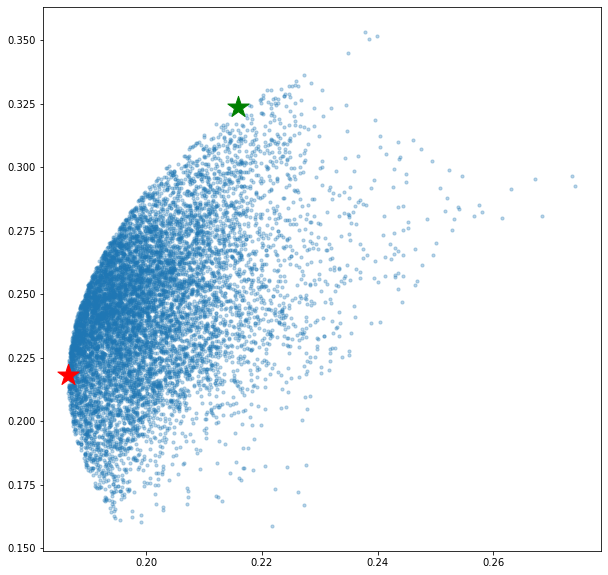

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')['Adj Close']

# Covariance and Correlation
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()

# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()

# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()

# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))

# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)

# idxmin() gives us the minimum value in the column specified.                               
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]

# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]

# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)